--2024-05-07 06:25:55--  https://raw.githubusercontent.com/jazxmok/Machine-Learning/main/Flat%20prices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9236008 (8.8M) [text/plain]
Saving to: ‘Flat prices.csv.3’

Flat prices.csv.3   100%[===================>]   8.81M  --.-KB/s    in 0.1s    

2024-05-07 06:25:55 (82.4 MB/s) - ‘Flat prices.csv.3’ saved [9236008/9236008]

Mean Squared Error: 6101.47991159483


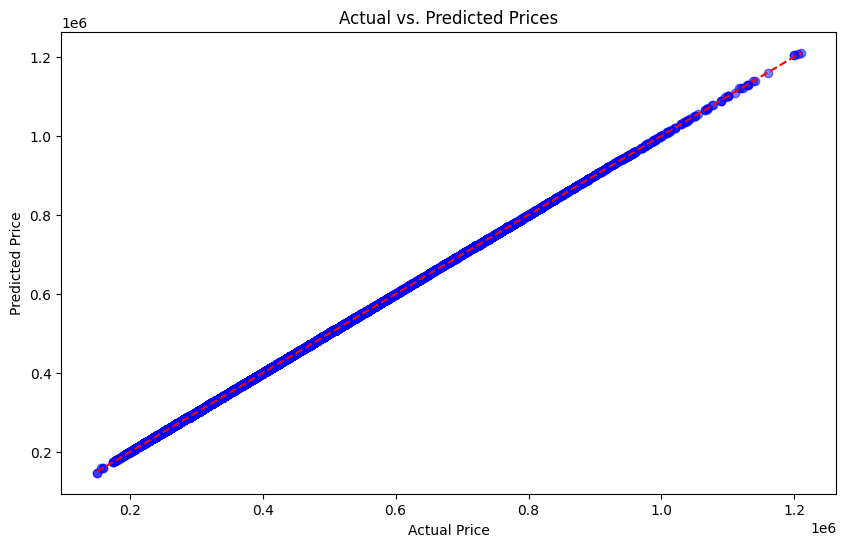

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/jazxmok/Machine-Learning/main/Flat%20prices.csv

# Step 2: Load the dataset
data = pd.read_csv("Flat prices.csv")

data = pd.get_dummies(data, columns=["flat_type"])
# Step 3: Define features (X) and target variable (y)
X = data.drop(columns=["month","town","block","street_name","storey_range","floor_area_sqm","flat_model",
                       "lease_commence_date","remaining_lease"])
y = data["resale_price"]

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 6: Train the model
rf_regressor.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Step 8: Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()